### Introduction to Multi Layer Perceptron Neural Networks

A neural network is created from a collection of neurons interlinked in layers. Scikit-learn has two multilayer perceptron networks that you can use: MLPClassifier and MLPRegressor. 

Let's first start with a dataset from sklearn.datasets. We will use the MNIST handwritten numbers dataset. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We can get the data from the openml repository at https://www.openml.org/search?type=data&sort=runs&status=active

sklearn has a nice method for downloading openml datasets

In [2]:
import sklearn.datasets as skl_data
data, labels = skl_data.fetch_openml('mnist_784', version=1, return_X_y=True)

/opt/homebrew/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# normalize data so that all values are between 0 and 1
data = data / 255.0

In [4]:
data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let's plot one of the images so you can see it.

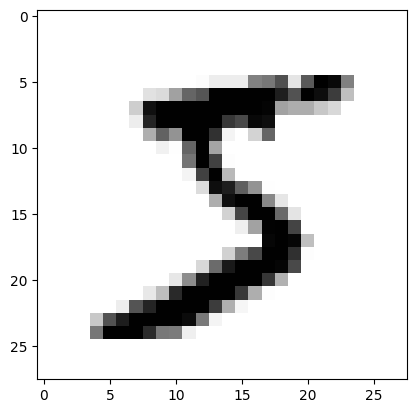

Label for test digit:  5


In [5]:
test_digit_image = data.iloc[0].values.reshape(28, 28)

plt.imshow(test_digit_image, cmap='binary')
plt.show()

print ("Label for test digit: ", labels.iloc[0])

In [6]:
# Split data into training and test subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1)

Now we can create our first MLPClassifier. It only has one hidden layer of 50 neurons. We set the random_state so that we get repeatable results for this notebook. Normally, you would not set it so that the weights would be set to random values each time.

Note that MLPClassifier allows us to set a fraction of the training set aside for validation. This is not the test set. It is to allow for early stopping if we are perfect on our validation.

In [7]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=50, validation_fraction = 0.2, early_stopping=True, random_state=1)

In [8]:
mlp.fit(X_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(50,), max_iter=50,
              random_state=1, validation_fraction=0.2)

In [9]:
# Print the performance
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.991500
Test set score: 0.968643


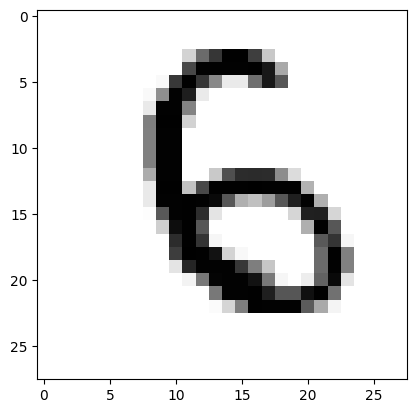

Prediction for test digit:  6
Prediction for test digit:  ['6']
Actual label for test digit:  6670    6
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [10]:
test_digit = X_test.iloc[0].to_numpy().reshape(1,784) # Convert from pandas to numpy array and reshape
test_digit_image = test_digit.reshape(28, 28)

import matplotlib.pyplot as plt
plt.imshow(test_digit_image, cmap='binary')
plt.show()

print ("Prediction for test digit: ", mlp.predict(test_digit)[0])
print ("Prediction for test digit: ", mlp.predict(X_test.iloc[0:1]))
print ("Actual label for test digit: ", y_test.iloc[0:1])

In [11]:
# get the predictions for all the test data
predicted = mlp.predict(X_test)

Now let's display the confusion matrix. 

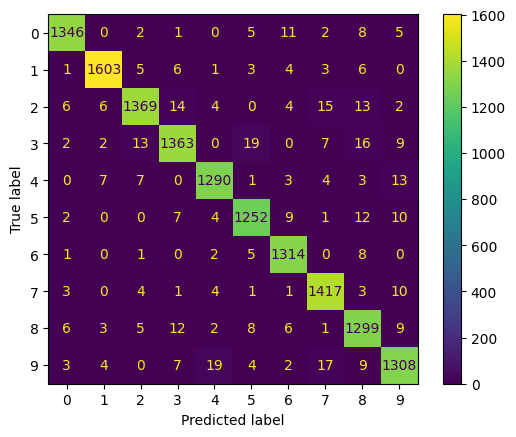

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,predicted)

In [13]:
# Print the accuracy, precision and recall of the model on the test data
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1380
           1       0.99      0.98      0.98      1632
           2       0.97      0.96      0.96      1433
           3       0.97      0.95      0.96      1431
           4       0.97      0.97      0.97      1328
           5       0.96      0.97      0.96      1297
           6       0.97      0.99      0.98      1331
           7       0.97      0.98      0.97      1444
           8       0.94      0.96      0.95      1351
           9       0.96      0.95      0.96      1373

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



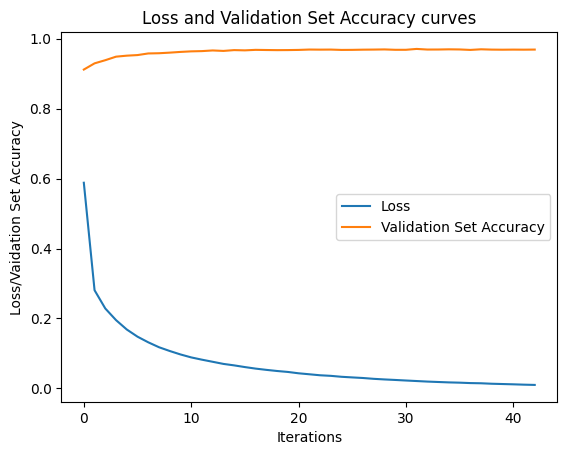

In [14]:
# Now let's plot the loss and validation curves

plt.plot(mlp.loss_curve_)
plt.plot(mlp.validation_scores_)
plt.xlabel('Iterations')
plt.ylabel('Loss/Vaidation Set Accuracy')
plt.legend(['Loss', 'Validation Set Accuracy'])
plt.title('Loss and Validation Set Accuracy curves')
plt.show()


In [15]:
# Now let's look at cross validation to see if there are any differences in the results
from sklearn.model_selection import cross_val_score

scores = cross_val_score(mlp, data, labels, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.97078571 0.96957143 0.96721429 0.966      0.97164286]


### Now let's try something maybe more difficult - Not really

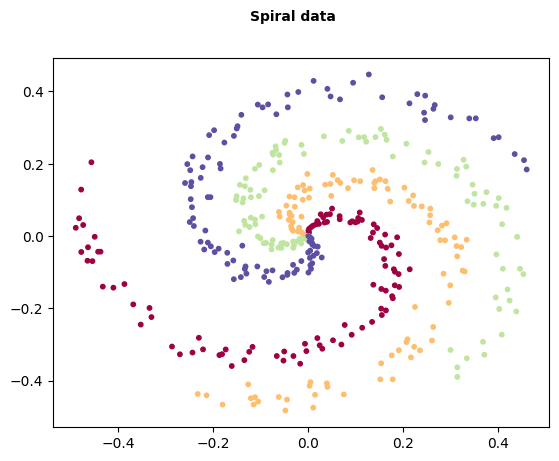

In [16]:
import numpy as np
import matplotlib.pyplot as plt


# STEP 1: build the data points 

sX = np.zeros([400,2], dtype = np.float32) # This has two entries: X[0] , x[1] 
sy = np.zeros(400, dtype = np.int32)       # This is the true classification  (from 1 to 4)

for j in range(4):
    ind = range(j*100, (j+1)*100)
    r = np.linspace(0,1.0,100) 
    t = np.linspace(j*5,(j+1)*5, 100) + np.random.randn(100)*0.2
    sX[ind] = 0.5*np.c_[r * np.sin(t), r * np.cos(t)] # The (x,y) values in a plane
    sy[ind] = j # This is the label

# Plot the figure
fig1 = plt.figure()
ax = fig1.add_subplot(111)
fig1.suptitle('Spiral data', fontsize=10, fontweight='bold')
ax.scatter(sX[:,0],sX[:,1], c = sy, s = 10, cmap= plt.cm.Spectral)

plt.show()

In [17]:
# Now build the model

spiralmlp = MLPClassifier(hidden_layer_sizes=(100,50,), max_iter=10000, random_state=1)

In [18]:
spiralmlp.fit(sX, sy)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=10000, random_state=1)

In [19]:
# Print the performance
print("Training set score: %f" % spiralmlp.score(sX, sy))


Training set score: 0.992500


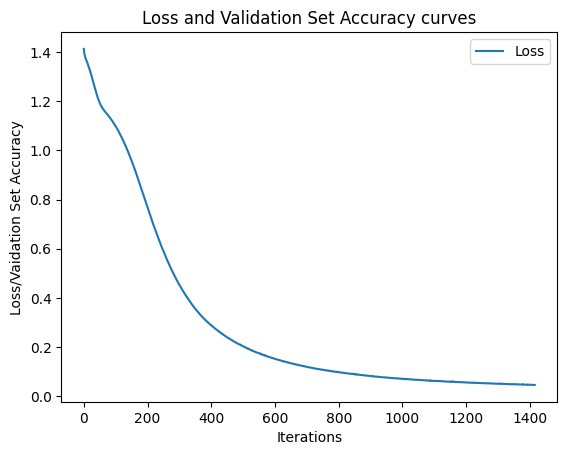

In [20]:
# Plot the loss and validation curves

plt.plot(spiralmlp.loss_curve_)
# plt.plot(spiralmlp.validation_scores_) # This is not available for MLPClassifier that doesn't do early stopping
plt.xlabel('Iterations')
plt.ylabel('Loss/Vaidation Set Accuracy')
plt.legend(['Loss', 'Validation Set Accuracy'])
plt.title('Loss and Validation Set Accuracy curves')
plt.show()

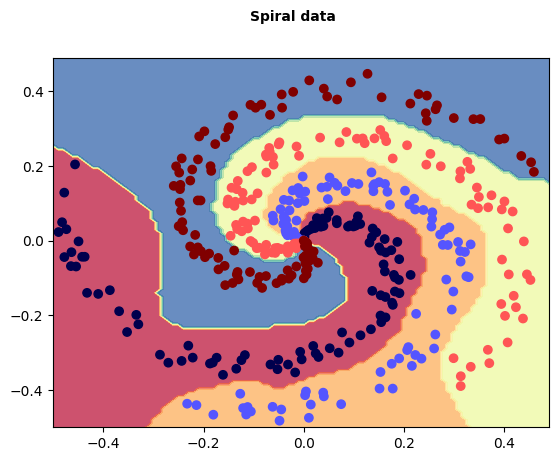

In [21]:
# plot the results
fig2 = plt.figure()
ax = fig2.add_subplot(111)
fig2.suptitle('Spiral data', fontsize=10, fontweight='bold')

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
xx, yy = np.meshgrid(np.arange(-0.5, 0.5, 0.01), np.arange(-0.5, 0.5, 0.01))
Z = spiralmlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

# Plot also the training points
ax.scatter(sX[:, 0], sX[:, 1], c=sy, cmap=plt.cm.seismic)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

plt.show()

### Now let's try it on the wisconsin breast cancer dataset

In [26]:
from sklearn.datasets import load_breast_cancer

iris = load_breast_cancer()
iX_train, iX_test, iy_train, iy_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=1)  

Use an MLPClassifier with 2 layers and early stopping but set the number of iterations with no change rather high.

In [36]:
imodel = MLPClassifier(solver='adam', hidden_layer_sizes=(3,3,), max_iter=10000, 
                       validation_fraction=0.2, early_stopping=True, tol=1e-07, n_iter_no_change=50, random_state=1)
imodel.fit(iX_train, iy_train)


MLPClassifier(early_stopping=True, hidden_layer_sizes=(3, 3), max_iter=10000,
              n_iter_no_change=50, random_state=1, tol=1e-07,
              validation_fraction=0.2)

In [37]:
# Print the classification report

print(classification_report(iy_test, imodel.predict(iX_test)))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        42
           1       0.93      0.89      0.91        72

    accuracy                           0.89       114
   macro avg       0.87      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114



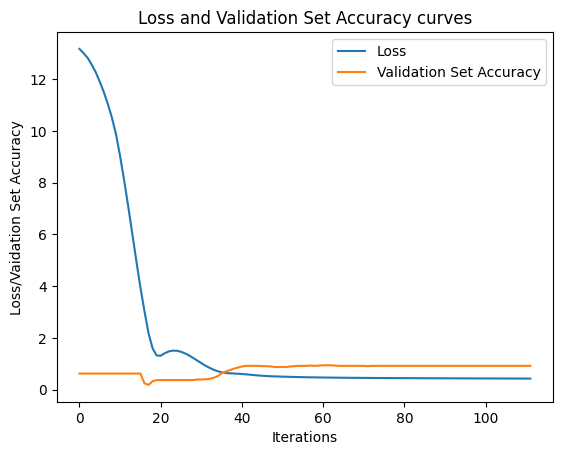

In [38]:
# Plot the loss and validation curves

plt.plot(imodel.loss_curve_)
plt.plot(imodel.validation_scores_) # This is not available for MLPClassifier that doesn't do early stopping
plt.xlabel('Iterations')
plt.ylabel('Loss/Vaidation Set Accuracy')
plt.legend(['Loss', 'Validation Set Accuracy'])
plt.title('Loss and Validation Set Accuracy curves')
plt.show()